In [17]:
def extract_time(input_str):
    import re
    data = re.split('m|s', input_str)
    time = float(data[0]) * 60 + float(data[1])
    return time

def read_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        real_time = extract_time(lines[-3].split()[1])
        user_time = extract_time(lines[-2].split()[1])
        sys_time = extract_time(lines[-1].split()[1])
    
    return real_time #, user_time, sys_time

In [18]:
# Read RPi results
device = 'rpi'
rpi_results = {}
folder_name = '{}_results'.format(device)

datasets = ['ElectricityLoadDiagrams', 
            'EnergyConsumptionFraunhofer', 
            'GuangzhouTraffic',
            # 'MetroInterstateTrafficVolume', # Did not use because KalmanHD was not able to finish, on all platforms
            'SanFranciscoTraffic']

for dataset in datasets:
    rpi_results[dataset] = {}
    for method in ['DNN', 'KalmanFilter', 'RegHD', 'VAE', 'KalmanHD']:
        folder_name = '{}_results'.format(device)
        filename = folder_name + '/' + method + '_' + dataset
        exec_time = read_file(filename)
            
        rpi_results[dataset][method] = exec_time
        
        
    #for method in ['KalmanHD']:
    #    print(method, dataset)
    #    folder_name = '{}_results_2'.format(device)
    #    filename = folder_name + '/' + method + '_' + dataset
    #    exec_time = read_file(filename)
            
    #    rpi_results[dataset][method] = exec_time
        
            
    print(dataset, '\n', rpi_results[dataset])

ElectricityLoadDiagrams 
 {'DNN': 10933.271, 'KalmanFilter': 215.885, 'RegHD': 1284.071, 'VAE': 518.728, 'KalmanHD': 1550.215}
EnergyConsumptionFraunhofer 
 {'DNN': 3426.716, 'KalmanFilter': 70.758, 'RegHD': 259.442, 'VAE': 262.264, 'KalmanHD': 2783.195}
GuangzhouTraffic 
 {'DNN': 9408.843, 'KalmanFilter': 182.387, 'RegHD': 657.908, 'VAE': 532.539, 'KalmanHD': 4250.161}
SanFranciscoTraffic 
 {'DNN': 2312.281, 'KalmanFilter': 66.959, 'RegHD': 255.081, 'VAE': 156.007, 'KalmanHD': 2316.593}


In [19]:
# Read CPU results
device = 'cpu'
cpu_results = {}
folder_name = '{}_results'.format(device)

datasets = ['ElectricityLoadDiagrams', 
            'EnergyConsumptionFraunhofer', 
            'GuangzhouTraffic',
            # 'MetroInterstateTrafficVolume', # Did not use because KalmanHD was not able to finish, on all platforms
            'SanFranciscoTraffic']

for dataset in datasets:
    cpu_results[dataset] = {}
    for method in ['DNN', 'KalmanFilter', 'RegHD']:
        folder_name = '{}_results'.format(device)
        filename = folder_name + '/' + method + '_' + dataset
        exec_time = read_file(filename)
            
        cpu_results[dataset][method] = exec_time
        
        
    for method in ['VAE', 'KalmanHD']:
        folder_name = '{}_results_2'.format(device)
        filename = folder_name + '/' + method + '_' + dataset
        exec_time = read_file(filename)
            
        cpu_results[dataset][method] = exec_time
            
    print(dataset, '\n', cpu_results[dataset])

ElectricityLoadDiagrams 
 {'DNN': 1885.358, 'KalmanFilter': 51.261, 'RegHD': 152.337, 'VAE': 1546.804, 'KalmanHD': 200.262}
EnergyConsumptionFraunhofer 
 {'DNN': 581.841, 'KalmanFilter': 17.184, 'RegHD': 45.144, 'VAE': 495.563, 'KalmanHD': 67.797}
GuangzhouTraffic 
 {'DNN': 1603.944, 'KalmanFilter': 43.593, 'RegHD': 110.054, 'VAE': 1321.815, 'KalmanHD': 196.323}
SanFranciscoTraffic 
 {'DNN': 393.652, 'KalmanFilter': 16.144, 'RegHD': 45.476, 'VAE': 323.446, 'KalmanHD': 55.169}


In [20]:
# Read GPU results
device = 'gpu'
gpu_results = {}
folder_name = '{}_results'.format(device)

datasets = ['ElectricityLoadDiagrams', 
            'EnergyConsumptionFraunhofer', 
            'GuangzhouTraffic',
            # 'MetroInterstateTrafficVolume', # Did not use because KalmanHD was not able to finish, on all platforms
            'SanFranciscoTraffic']
methods = ['DNN', 'VAE', 'KalmanFilter', 'RegHD', 'KalmanHD']


for dataset in datasets:
    gpu_results[dataset] = {}
    for method in methods:
        filename = folder_name + '/' + method + '_' + dataset
        exec_time = read_file(filename)
            
        gpu_results[dataset][method] = exec_time
            
    print(dataset, '\n', gpu_results[dataset])

ElectricityLoadDiagrams 
 {'DNN': 1915.083, 'VAE': 1529.882, 'KalmanFilter': 50.696, 'RegHD': 152.05700000000002, 'KalmanHD': 217.309}
EnergyConsumptionFraunhofer 
 {'DNN': 604.068, 'VAE': 486.68, 'KalmanFilter': 17.551, 'RegHD': 45.832, 'KalmanHD': 70.248}
GuangzhouTraffic 
 {'DNN': 1673.598, 'VAE': 1330.399, 'KalmanFilter': 42.403, 'RegHD': 109.84, 'KalmanHD': 178.84199999999998}
SanFranciscoTraffic 
 {'DNN': 408.84000000000003, 'VAE': 322.368, 'KalmanFilter': 16.148, 'RegHD': 44.828, 'KalmanHD': 56.088}


<ipython-input-29-1adf196c8ee1>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, 10)


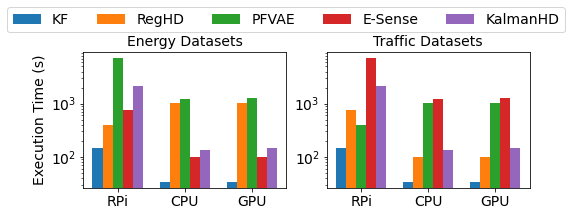

In [29]:

import matplotlib.pyplot as plt
import numpy as np

def get_cmap(name='tab10'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, 10)
colors = get_cmap()

platforms = ['RPi', 'CPU', 'GPU']
x = np.arange(3)  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig = plt.figure(figsize=(8, 2.5))

ax = fig.add_subplot(121)
energy_datasets = ['ElectricityLoadDiagrams', 'EnergyConsumptionFraunhofer']
methods = ['KalmanFilter', 'VAE', 'DNN', 'RegHD', 'KalmanHD']

for method in methods:
    offset = width * multiplier
    rpi_data = np.array([rpi_results[dataset][method] for dataset in energy_datasets]).mean()
    cpu_data = np.array([cpu_results[dataset][method] for dataset in energy_datasets]).mean()
    gpu_data = np.array([gpu_results[dataset][method] for dataset in energy_datasets]).mean()
    #print(rpi_data, cpu_data)
    rects = ax.bar(x + offset, (rpi_data, cpu_data, gpu_data), width, color=colors(multiplier), label=method)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_yscale('log')
ax.set_ylabel('Execution Time (s)', size=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xticks(x + width * 2, platforms)
plt.title('Energy Datasets', fontsize=14)
plt.rcParams.update({'font.size': 14})


ax = fig.add_subplot(122)
traffic_datasets = ['ElectricityLoadDiagrams', 'EnergyConsumptionFraunhofer']
methods = ['KalmanFilter', 'RegHD', 'VAE', 'DNN', 'KalmanHD']
methods_dict = {
    'KalmanFilter': 'KF',
    'VAE': 'PFVAE',
    'RegHD': 'RegHD',
    'DNN': 'E-Sense',
    'KalmanHD': 'KalmanHD'
    
}
multiplier = 0

for method in methods:
    offset = width * multiplier
    rpi_data = np.array([rpi_results[dataset][method] for dataset in traffic_datasets]).mean()
    cpu_data = np.array([cpu_results[dataset][method] for dataset in traffic_datasets]).mean()
    gpu_data = np.array([gpu_results[dataset][method] for dataset in traffic_datasets]).mean()
    #print(rpi_data, cpu_data)
    rects = ax.bar(x + offset, (rpi_data, cpu_data, gpu_data), width, color=colors(multiplier), label=methods_dict[method])
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_yscale('log')
#ax.set_ylabel('Execution Time (s)', size=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xticks(x + width * 2, platforms)
plt.title('Traffic Datasets', fontsize=14)
plt.rcParams.update({'font.size': 14})

plt.legend(bbox_to_anchor=(-0.2, 1.35), loc='upper center', ncol=5, borderaxespad=0.2, fontsize=14)
#plt.tight_layout()
plt.savefig('eff2.png', dpi=300, bbox_inches='tight')